<a href="https://colab.research.google.com/github/pireylow/LSTM-keras-stock-price-prediction/blob/main/3_Candles_Breakout_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import random
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [3]:
ticker = 'SPY'
startdate = '2018-01-01'
enddate = '2023-01-01'
period = '1d'

start = pd.to_datetime(startdate)
end = pd.to_datetime(enddate)
sdata = pdr.get_data_yahoo(ticker, start=start, end=end, interval = period)

columnsTitles=['Open','High','Low','Close','Volume','Adj Close']
sdata=sdata.reindex(columns=columnsTitles)

[*********************100%***********************]  1 of 1 completed


In [4]:
open=sdata['Open'].dropna()
high=sdata['High'].dropna()
low=sdata['Low'].dropna()
close=sdata['Close'].dropna()

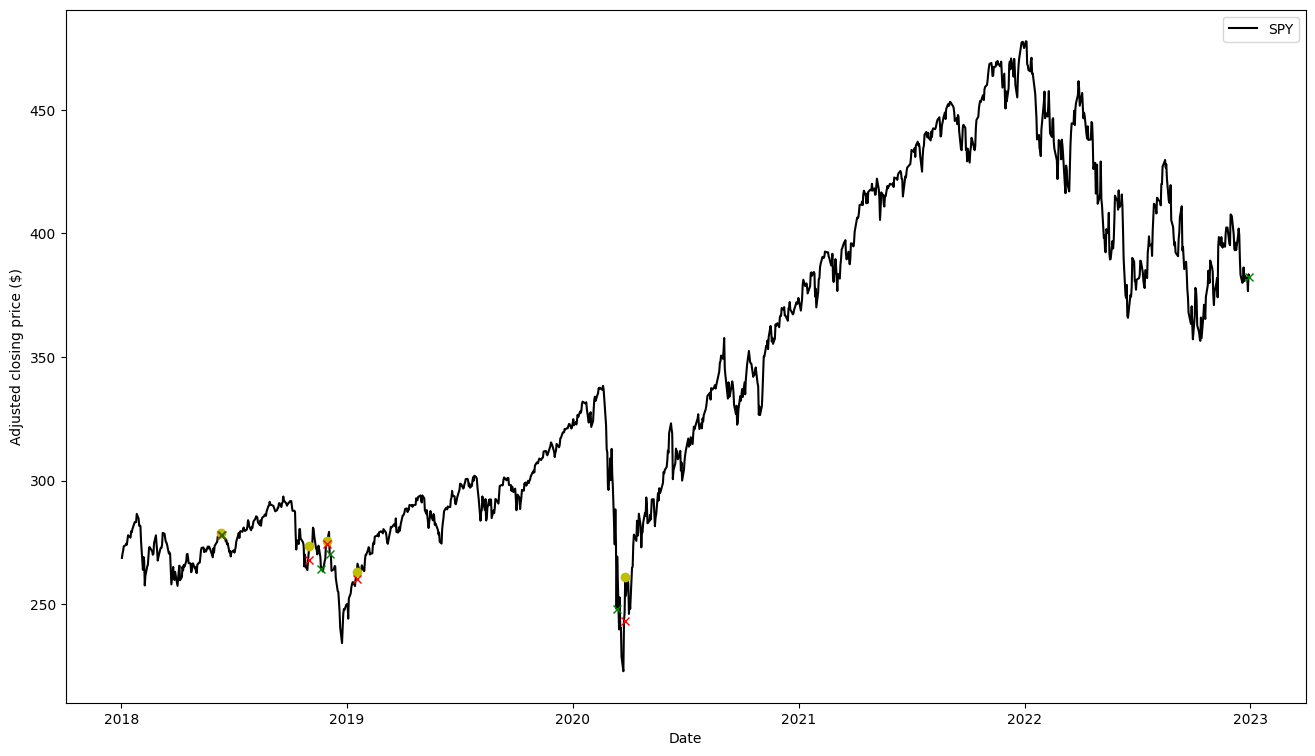

In [5]:


fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close.index, close, label=ticker, color = 'k')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

profit_list = [ ]
profit_info = [ ]
profit = 0

big_value = 0.75
small_value = 0.2

ma_val = 50
rolling_ma = close.ewm(span=ma_val, adjust=False).mean()

time_counter = ma_val+10
while time_counter <= len(close):
  big_ratio = (close[time_counter-2] - open[time_counter-2])/(high[time_counter-2] - low[time_counter-2])
  small_ratio = (abs(close[time_counter-1] - open[time_counter-1]))/(high[time_counter-1] - low[time_counter-1])

  #entry condition ....
  if big_ratio >= big_value and small_ratio <= small_value and close[time_counter] > close[time_counter-1]:
    entry_price = close[time_counter]
    stop_loss = close[time_counter-2]
    profit_info.append(('entry', time_counter, entry_price))
    ax.plot(close.index[time_counter], entry_price, 'o', color = 'y')
    ax.plot(close.index[time_counter], stop_loss, 'x', color = 'r')

    #FF
    FF_loop_flag = True
    time_counter += 1
    while FF_loop_flag and close[time_counter] >= stop_loss and close[time_counter] >= close[time_counter]-5:
      time_counter += 1
      if time_counter >= len(close):
        FF_loop_flag = False
        time_counter -= 1

    exit_price = close[time_counter]
    profit = profit + (exit_price - entry_price)
    profit_info.append(('exit', time_counter, exit_price, exit_price - entry_price))
    profit_list.append(exit_price - entry_price)
    ax.plot(close.index[time_counter], exit_price, 'x', color = 'g')

  time_counter += 1


In [6]:
profit_info

[('entry', 111, 278.9200134277344),
 ('exit', 112, 278.0299987792969, -0.8900146484375),
 ('entry', 211, 273.510009765625),
 ('exit', 224, 264.1199951171875, -9.3900146484375),
 ('entry', 231, 275.6499938964844),
 ('exit', 233, 270.25, -5.399993896484375),
 ('entry', 262, 262.9599914550781),
 ('exit', 551, 248.11000061035156, -14.849990844726562),
 ('entry', 561, 261.20001220703125),
 ('exit', 1258, 382.42999267578125, 121.22998046875)]

In [7]:
profit


90.69996643066406